In [1]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import tensorflow as tf
tf.test.gpu_device_name()

Mounted at /content/drive


'/device:GPU:0'

In [2]:
#import packages

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline
import re
import sys
import warnings
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import joblib

In [3]:
#needed for DNN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.regularizers import l2,l1
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
# from keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from sklearn import preprocessing
from keras import layers
from tensorflow.keras.layers import LSTM,GRU,Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.utils import shuffle

In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing"
df=pd.read_csv(path +  '/dataset/created/cleaned_df.csv', encoding='utf-8')
df =  shuffle(df).reset_index(drop=True)
df.head()


,text,label,cleaned_text
0,also i think i might try to get a refund for m...,1,also think might try get refund steel panther ...
1,yes! i already have told you about it do i ne...,0,yes already tell need go get im pretty much go...
2,you know what m ive finally reached to a conc...,1,know ive finally reach conclusion life absolut...
3,i guess i just want to let the weight break me...,1,guess want let weight break point true happine...
4,the usa should get sex\r\nof the table or ther...,1,usa get sex table never privacy usa dare presi...


In [5]:
df.label.value_counts()

0    24720
1    24458
Name: label, dtype: int64

In [6]:
#split the data in train, validation, test

def dataset_split(headlines,category):

    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [7]:
df.clean_text=df.cleaned_text.astype(str)

X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(df.clean_text,df.label)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 49178 
	Training		 39834 
	Test			 4918 
	Validation		 4426


In [8]:
#define perameters for GRU and padding and tokenization
vocab_size =50000
embedding_dim = 64
max_length = 60
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [9]:
# Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train.values)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train.values)
train_padded = pad_sequences(train_sequences,padding=padding_type, maxlen=max_length)

In [10]:
#Tokenizer Info
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
#insightful info about tokens
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)

#Print all the information
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )    
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

Words --> Counts:
want 	 19891
dont 	 11496
life 	 11353
go 	 10295
get 	 9524
like 	 9202
im 	 8969
know 	 7332
feel 	 7027
end 	 6740

Words --> Documents:
want 	 15103
life 	 8895
dont 	 8099
go 	 7514
im 	 7033
get 	 6698
like 	 6634
end 	 6020
live 	 5573
know 	 5231

Words --> Index:
sksk 	 36121
blvd 	 36120
administers 	 36119
amlookjng 	 36118
normalagain 	 36117
scaryi 	 36116
existanti 	 36115
hatr 	 36114
serioualy 	 36113
guessive 	 36112

Total Documents --> 39834
Found 36121 unique tokens


In [11]:
def padded_headlines(original,encoded,padded):
  print("\n\t\t\t Encoded Sequences ","\n")  
  print(original,"\n",encoded) 
  print("\n\t\t\t Paded Sequences \n",original,"\n",padded)

padded_headlines(X_train[10],train_sequences[10],train_padded[10])


			 Encoded Sequences  

hold second doctor dont think instant sleep herb really necessary sleep aid cool dont think something take instantly make fall asleep could safe 
 [270, 21, 489, 166, 311, 610, 773, 7, 168, 393, 42, 302, 186, 221, 11, 932, 16]

			 Paded Sequences 
 hold second doctor dont think instant sleep herb really necessary sleep aid cool dont think something take instantly make fall asleep could safe 
 [270  21 489 166 311 610 773   7 168 393  42 302 186 221  11 932  16   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]


In [12]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid.values)
validation_padded = pad_sequences(validation_sequences,padding=padding_type, maxlen=max_length)
# padded_headlines(X_valid[47000],validation_sequences[47000],validation_padded[47000])


In [13]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test.values)
test_padded = pad_sequences(test_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_test[35000],test_sequences[35000],test_padded[5000])


In [14]:
train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

In [15]:
accuracy_threshold = 0.99
vocab_size = 50000
embedding_dim=128
max_length = 60
num_category = 2
opt=RMSprop(0.001)

In [16]:
keras.backend.clear_session()
#callback function for early stopping
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()

**Bidirectional GRU**

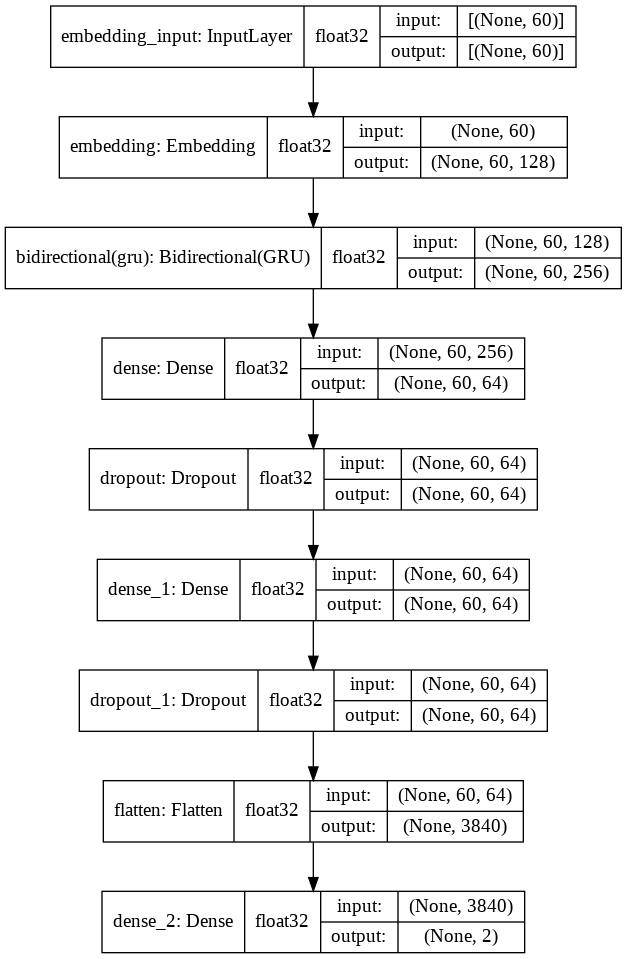

In [17]:

filepath = path + "/model/BidGruModel.h5"

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',  
                                    factor=0.1, patience=2, 
                                    verbose=1, mode='auto', 
                                    min_delta=0.0001, cooldown=1, min_lr=0.000001)
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='auto')
callback_list = [acc_callback, checkpoint,reduceLROnPlat]
# checkpoint = ModelCheckpoint(s , monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = RMSprop(lr=1e-2, epsilon=1e-08)


BGRU_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]),
    tf.keras.layers.Bidirectional(GRU(128,return_sequences=True,dropout=0.2)),
    #tf.keras.layers.Bidirectional(GRU(64, dropout = 0.2, recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])

tf.keras.utils.plot_model(BGRU_model, to_file= path+ '/model/model structure/BGRUmodel.png',show_shapes=True,show_dtype=True)


In [18]:
BGRU_model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
BGRU_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 128)           6400000   
_________________________________________________________________
bidirectional (Bidirectional (None, 60, 256)           198144    
_________________________________________________________________
dense (Dense)                (None, 60, 64)            16448     
_________________________________________________________________
dropout (Dropout)            (None, 60, 64)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 60, 64)            4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3840)              0

In [19]:
num_epochs = 20
batch = 128

BGRU_model_history = BGRU_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/20
312/312 [==============================] - 18s 41ms/step - loss: 0.7833 - accuracy: 0.7968 - val_loss: 0.5253 - val_accuracy: 0.8186

Epoch 00001: val_accuracy improved from -inf to 0.81857, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/BidGruModel.h5
Epoch 2/20
312/312 [==============================] - 12s 37ms/step - loss: 0.3712 - accuracy: 0.9173 - val_loss: 0.1992 - val_accuracy: 0.9239

Epoch 00002: val_accuracy improved from 0.81857 to 0.92386, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/BidGruModel.h5
Epoch 3/20
312/312 [==============================] - 12s 37ms/step - loss: 0.1658 - accuracy: 0.9465 - val_loss: 0.3300 - val_accuracy: 0.8414

Epoch 00003: val_accuracy did not improve from 0.92386
Epoch 4/20
312/312 [==============================] - 12s 37ms/step - loss: 0.2061 - accuracy: 0.9606 - val_loss: 0.206

In [20]:
# Plot training results
def model_evaluate(history,directory,filename):
  H = history.history
  fig = plt.figure(figsize = (20, 7))
  plt.subplot(121)
  plt.xlabel("number of epoch")
  plt.ylabel("Validation accuracy")
  plt.plot(H['accuracy'], label = 'acc')
  plt.plot(H['val_accuracy'], label = 'val_acc')
  plt.grid()
  plt.legend()
  plt.subplot(122)
  plt.xlabel("number of epoch")
  plt.ylabel("Validation loss")
  plt.plot(H['loss'], label = 'loss')
  plt.plot(H['val_loss'], label = 'val_loss')
  plt.grid()
  plt.legend()
  plt.savefig(path + "/model/"+directory+"/"+filename+".png")


In [21]:
# Plot all model results
def model_all_evaluate(history1,history2,history3,history4,directory,filename):
  H1 = history1.history
  H2 = history2.history
  H3 = history3.history
  H4 = history4.history
  fig = plt.figure(figsize = (20, 7))
  plt.subplot(121)
  plt.xlabel("number of epoch")
  plt.ylabel("Validation accuracy")
  plt.plot(H1['val_accuracy'], label = 'Bidirectional GRU')
  plt.plot(H2['val_accuracy'], label = 'Bidirectional LSTM')
  plt.plot(H3['val_accuracy'], label = 'LSTM')
  plt.plot(H4['val_accuracy'], label = 'C_LSTM')
  # plt.plot(H5['val_accuracy'], label = 'C-LSTM')

  
  plt.grid()
  plt.legend()
  plt.subplot(122)
  plt.xlabel("number of epoch")
  plt.ylabel("Validation loss")
  plt.plot(H1['val_loss'], label = 'Bidirectional GRU')
  plt.plot(H2['val_loss'], label = 'Bidirectional LSTM')
  plt.plot(H3['val_loss'], label = 'LSTM')
  plt.plot(H4['val_loss'], label = 'C_LSTM')
  # plt.plot(H5['val_loss'], label = 'C-LSTM')
  plt.grid()
  plt.legend()
  plt.savefig(path + "/model/" +directory+ "/" +filename+ ".png")


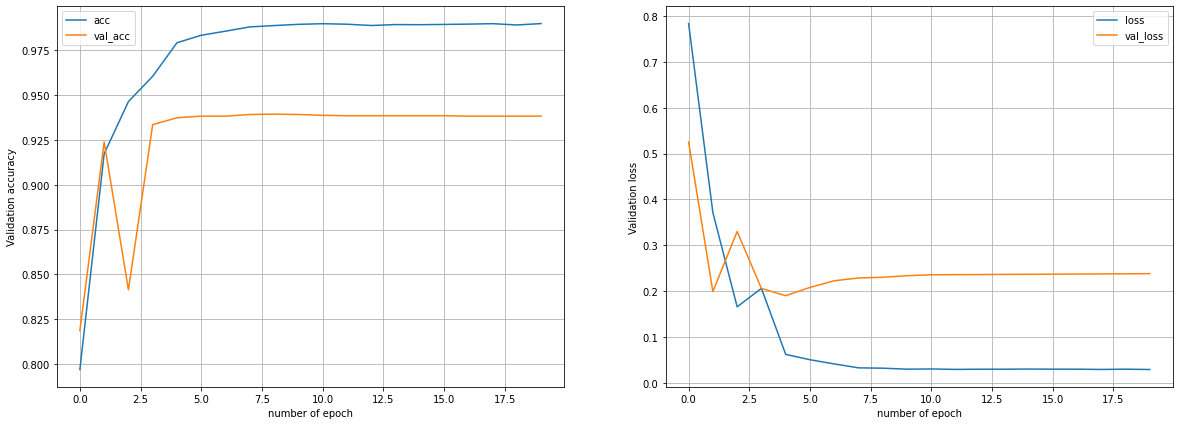

In [22]:
model_evaluate(BGRU_model_history,"BiGru","Bi_Gru_evaluation")

In [23]:
#confusion matrix
def conf_matrix(y_pred,classfier,directory,filename, figsize=(5,5)):
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d' % (p, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sn.heatmap(cm, cmap= "magma", annot=annot, fmt='', ax=ax)
    plt.title('\n'+classfier+'Accuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    plt.savefig(path + "/model/"+directory+"/"+filename+".png")
    plt.show()
    plt.close()
# def conf_matrix(y_pred,classfier,directory,filename):

#   cm = confusion_matrix(y_test, y_pred) 
# # Transform to df for easier plotting
  
#   cm_df = pd.DataFrame(cm,
#                        index = ['Political', 'acceptable', 'religious', 'sexual'], 
#                        columns = ['Political', 'acceptable', 'religious', 'sexual'])
#   plt.figure(figsize=(8,6))
#   sn.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
#   plt.title('\n'+classfier+'Accuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
#   plt.ylabel('True label')
#   plt.xlabel('Predicted label')
#   plt.xticks(rotation = 45)
#   plt.yticks(rotation = 45)
#   plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
#   plt.show()
#   plt.close()

In [24]:
#make predictions

model = load_model(path+"/model/BidGruModel.h5")
predictions = model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)


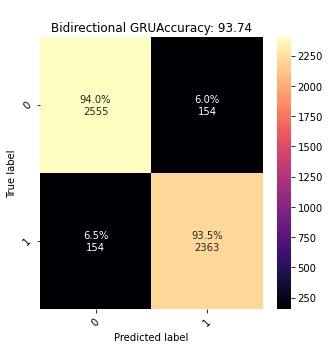

In [25]:
conf_matrix(y_pred,"Bidirectional GRU","BiGru","Bi_Gru_confusion_matrix")

**Bidirectional LSTM**

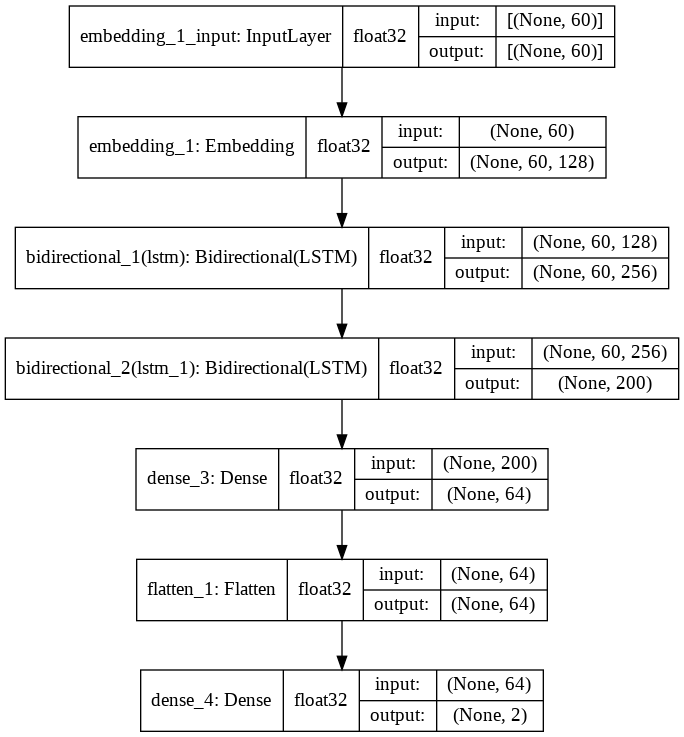

In [26]:
embedding_dim=128
filepath = path+"/model/BiLSTM.h5"
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',  
                                    factor=0.1, patience=2, 
                                    verbose=1, mode='auto', 
                                    min_delta=0.0001, cooldown=1, min_lr=0.000001)
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='auto')
callback_list = [acc_callback, checkpoint,reduceLROnPlat]
RNN_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]),
    tf.keras.layers.Bidirectional(LSTM(128,dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])
tf.keras.utils.plot_model(RNN_model, to_file= path+ '/model/model structure/BiLSTMmodel.png', show_shapes=True, show_dtype=True,)


In [27]:
RNN_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(RNN_model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 128)           6400000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60, 256)           263168    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               285600    
_________________________________________________________________
dense_3 (Dense)              (None, 64)                12864     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 6,961,762
Trainable params: 6,961,762
Non-trainable params: 0
____________________________________________

In [28]:
num_epochs = 20
batch = 128

RNN_history = RNN_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)



Epoch 1/20
312/312 [==============================] - 511s 2s/step - loss: 0.3218 - accuracy: 0.8625 - val_loss: 0.2112 - val_accuracy: 0.9184

Epoch 00001: val_accuracy improved from -inf to 0.91844, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/BiLSTM.h5
Epoch 2/20
312/312 [==============================] - 495s 2s/step - loss: 0.1798 - accuracy: 0.9389 - val_loss: 0.2007 - val_accuracy: 0.9297

Epoch 00002: val_accuracy improved from 0.91844 to 0.92973, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/BiLSTM.h5
Epoch 3/20
312/312 [==============================] - 485s 2s/step - loss: 0.1375 - accuracy: 0.9532 - val_loss: 0.1960 - val_accuracy: 0.9304

Epoch 00003: val_accuracy improved from 0.92973 to 0.93041, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/BiLST

In [29]:
#make predictions

RNN_model = load_model(path+"/model/BiLSTM.h5")
RNN_predictions = RNN_model.predict(test_padded)
y_pred = np.argmax(RNN_predictions, axis=1)

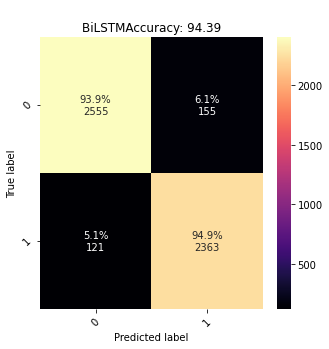

In [30]:
conf_matrix(y_pred,"BiLSTM","BiLSTM","BiLSTM_confusion_matrix")

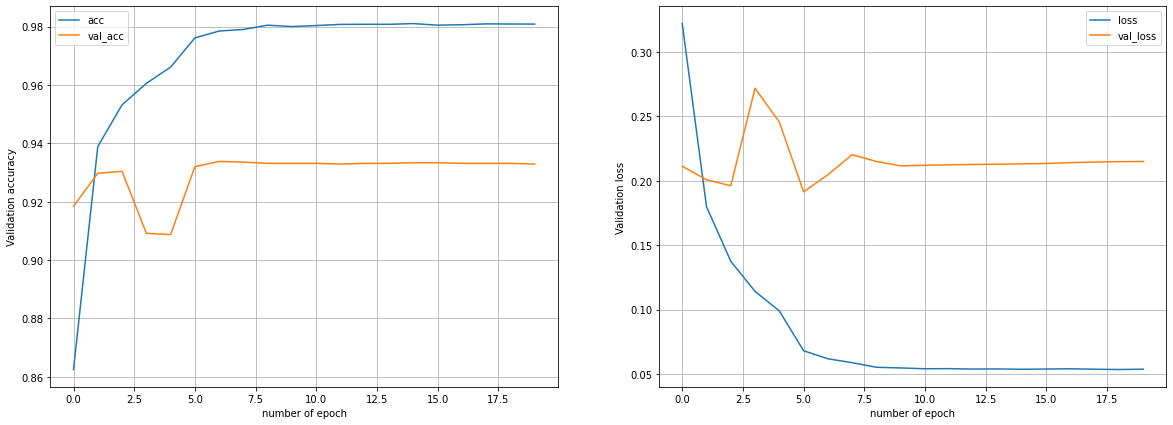

In [31]:
# Plot training results
model_evaluate(RNN_history,"BiLSTM","BiLSTM_evaluation")


**LSTM**

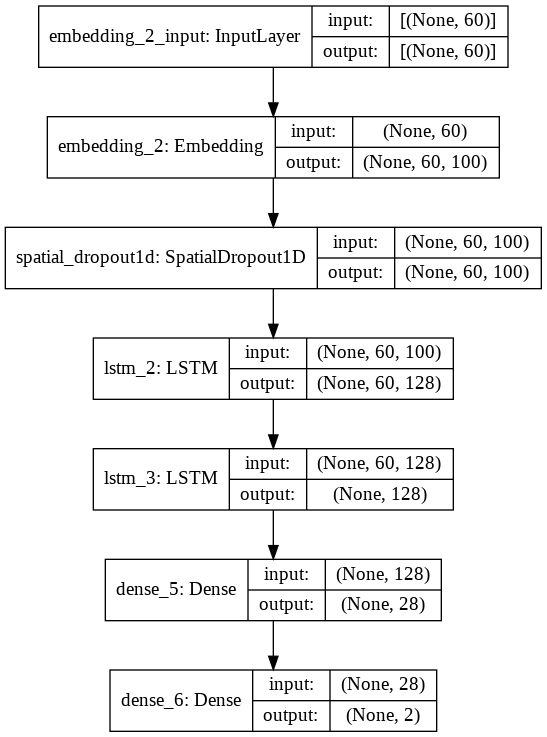

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.vis_utils import plot_model
filepath = path+"/model/LSTM.h5"
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',  
                                    factor=0.1, patience=2, 
                                    verbose=1, mode='auto', 
                                    min_delta=0.0001, cooldown=1, min_lr=0.000001)
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='auto')
callback_list = [acc_callback, checkpoint,reduceLROnPlat]

embedding_dim=100
LSTM_model = Sequential()
LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))
LSTM_model.add(SpatialDropout1D(0.2))
LSTM_model.add(LSTM(128,return_sequences=True, recurrent_dropout=0.5))
LSTM_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
#LSTM_model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1))
LSTM_model.add(Dense(28, activation="relu"))
LSTM_model.add(Dense(num_category, activation='softmax'))
plot_model(LSTM_model, to_file= path+ '/model/model structure/LSTMmodel.png', show_shapes=True, show_layer_names=True)

In [33]:
LSTM_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(LSTM_model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 100)           5000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 60, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 128)           117248    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_5 (Dense)              (None, 28)                3612      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 58        
Total params: 5,252,502
Trainable params: 5,252,502
Non-trainable params: 0
____________________________________________

In [34]:
num_epochs = 20
batch = 128

LSTM_history = LSTM_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)


Epoch 1/20
312/312 [==============================] - 240s 752ms/step - loss: 0.5837 - accuracy: 0.6525 - val_loss: 0.6595 - val_accuracy: 0.5314

Epoch 00001: val_accuracy improved from -inf to 0.53141, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/LSTM.h5
Epoch 2/20
312/312 [==============================] - 233s 748ms/step - loss: 0.2736 - accuracy: 0.8987 - val_loss: 0.2692 - val_accuracy: 0.9110

Epoch 00002: val_accuracy improved from 0.53141 to 0.91098, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/LSTM.h5
Epoch 3/20
312/312 [==============================] - 228s 730ms/step - loss: 0.1983 - accuracy: 0.9352 - val_loss: 0.2612 - val_accuracy: 0.9132

Epoch 00003: val_accuracy improved from 0.91098 to 0.91324, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/

In [35]:
#make predictions

LSTM_model = load_model(path+"/model/LSTM.h5")
predictions = LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

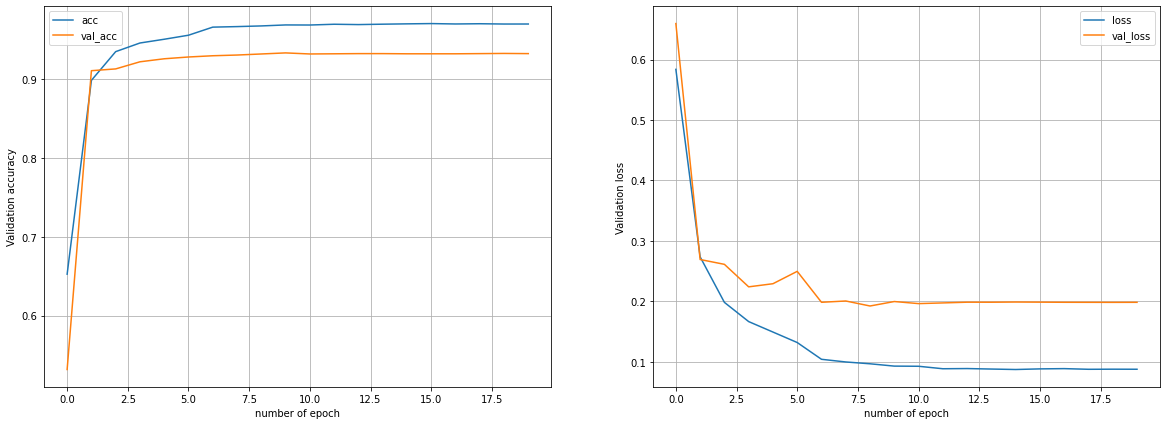

In [36]:
# Plot training results
model_evaluate(LSTM_history,"LSTM","LSTM_evaluation")


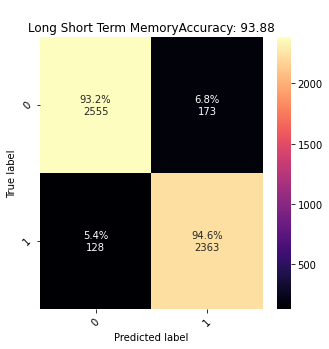

In [37]:
conf_matrix(y_pred,"Long Short Term Memory","LSTM","LSTM_confusion_matrix")

In [38]:
#testing out
txt = ["I didn't want to wake up. I was having a much better time asleep."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = LSTM_model.predict(padded)

labels = ['1', '0']
print(pred, labels[np.argmax(pred)])

[[0.9214231  0.07857697]] 1


**C-LSTM**

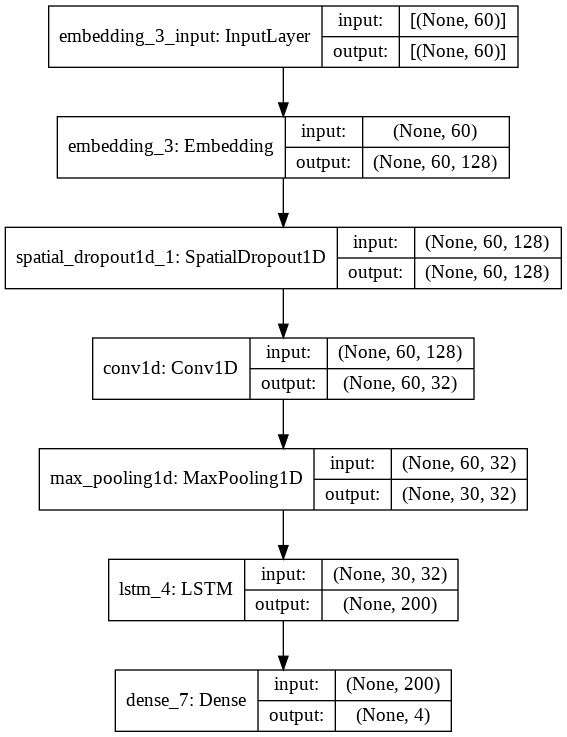

In [39]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

filepath = path+"/model/C-LSTM.h5"
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',  
                                    factor=0.1, patience=2, 
                                    verbose=1, mode='auto', 
                                    min_delta=0.0001, cooldown=1, min_lr=0.000001)
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='auto')
callback_list = [acc_callback, checkpoint,reduceLROnPlat]
embedding_dim=128
# create the model
C_LSTM_model = Sequential()
C_LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))
C_LSTM_model.add(SpatialDropout1D(0.7))
C_LSTM_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
C_LSTM_model.add(MaxPooling1D(pool_size=2))
C_LSTM_model.add(LSTM(200, dropout=0.5, recurrent_dropout=0.5))
C_LSTM_model.add(Dense(4, activation='softmax'))
plot_model(C_LSTM_model, to_file= path+ '/model/model structure/C_LSTMmodel.png', show_shapes=True, show_layer_names=True)



In [40]:
C_LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(C_LSTM_model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 60, 128)           6400000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 60, 128)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 60, 32)            12320     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 30, 32)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 200)               186400    
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 804       
Total params: 6,599,524
Trainable params: 6,599,524
Non-trainable params: 0
____________________________________________

In [41]:
num_epochs = 20
batch = 128

C_LSTM_history = C_LSTM_model.fit(train_padded, train_label_seq,
                           epochs=num_epochs,
                           batch_size = batch,
                           validation_data=(validation_padded,valid_label_seq),
                           verbose=1,
                           callbacks = callback_list)


Epoch 1/20
312/312 [==============================] - 108s 250ms/step - loss: 0.6853 - accuracy: 0.5371 - val_loss: 0.6195 - val_accuracy: 0.6618

Epoch 00001: val_accuracy improved from -inf to 0.66177, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/C-LSTM.h5
Epoch 2/20
312/312 [==============================] - 76s 245ms/step - loss: 0.3676 - accuracy: 0.8463 - val_loss: 0.2837 - val_accuracy: 0.8963

Epoch 00002: val_accuracy improved from 0.66177 to 0.89629, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/model/C-LSTM.h5
Epoch 3/20
312/312 [==============================] - 79s 252ms/step - loss: 0.2327 - accuracy: 0.9129 - val_loss: 0.2212 - val_accuracy: 0.9230

Epoch 00003: val_accuracy improved from 0.89629 to 0.92296, saving model to /content/drive/MyDrive/Colab Notebooks/Suicide Ideation Detection using natural Language Processing/mode

In [42]:
#make predictions

C_LSTM_model = load_model(path+"/model/C-LSTM.h5")
predictions = C_LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

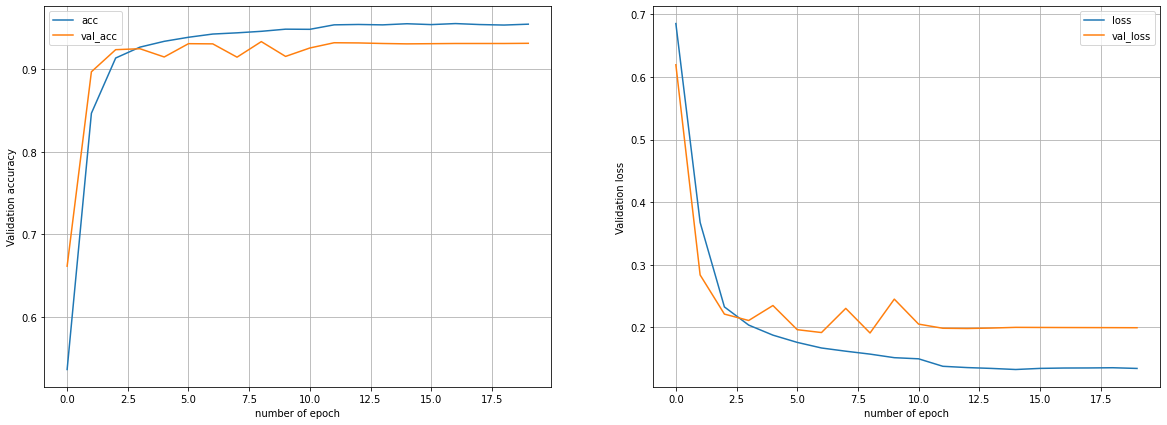

In [43]:
# Plot training results
model_evaluate(C_LSTM_history,"C_LSTM","C_LSTM_evaluation")


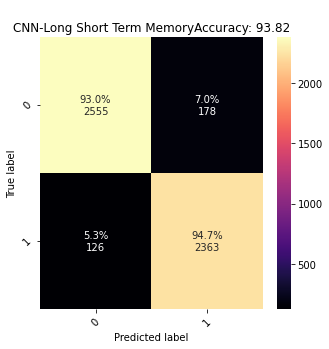

In [44]:
conf_matrix(y_pred,"CNN-Long Short Term Memory","C_LSTM","C_LSTM_confusion_matrix")

**Result analysis**

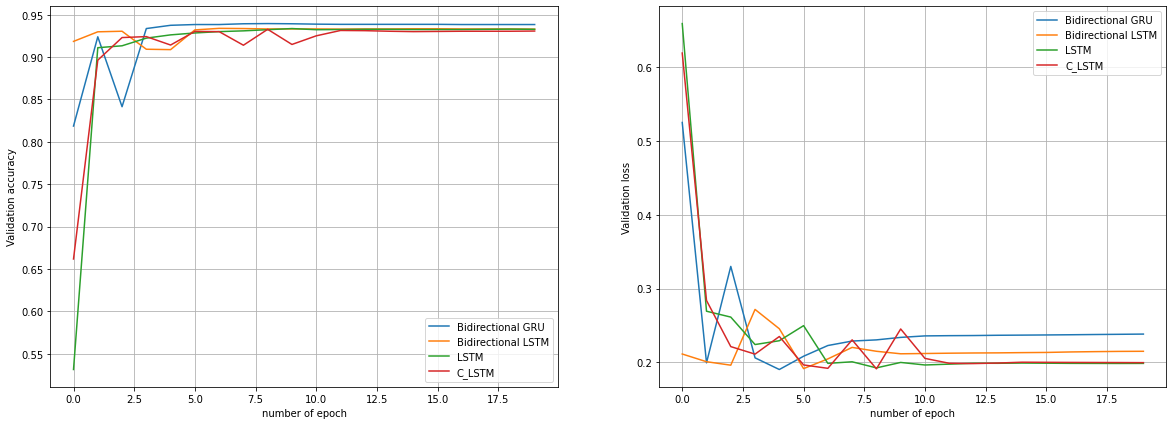

In [45]:
model_all_evaluate(BGRU_model_history,RNN_history,LSTM_history,C_LSTM_history,"DL comparison","val_eva")

In [46]:

MLA = {
     'Bidirectional GRU' : model,
     'Bidirectional LSTM' : RNN_model,
     'LSTM' : LSTM_model,
     'C_LSTM' : C_LSTM_model, 
}

In [47]:
from sklearn.metrics import *
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=2
row_index = 0
for name,alg in MLA.items():
    #fp, tp, th = roc_curve(y_test, predicted ,pos_label=['Political', 'acceptable', 'religious', 'sexual'])
    MLA_name = name
    #alg.fit(X_train, y_train)
    predicted = alg.predict(test_padded)
    y_pred = np.argmax(predicted, axis=1)
    auc_score = roc_auc_score(y_test, y_pred)
    micro_averaged_recall = recall_score(testing_label_seq, y_pred, average = 'micro')
    macro_averaged_f1 = f1_score(testing_label_seq, y_pred, average = 'macro')
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Test Accuracy'] = accuracy_score(testing_label_seq,y_pred)
    compare.loc[row_index, 'Precision'] = precision_score(testing_label_seq, y_pred)
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    compare.loc[row_index, 'auc Score'] = auc_score
    row_index+=1
    
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

,Name,Test Accuracy,Precision,Recall,F1 Score,auc Score
1,Bidirectional LSTM,0.943880,0.935336,0.943880,0.943822,0.944064
2,LSTM,0.938796,0.928156,0.938796,0.938742,0.939061
3,C_LSTM,0.938186,0.926294,0.938186,0.938136,0.938505
0,Bidirectional GRU,0.937373,0.934829,0.937373,0.937277,0.937277


In [48]:
#plot comaparison 
def compare_plots(y_value,directory,filename):
  plt.subplots(figsize=(11,8))
  sn.barplot(x="Name", y=y_value ,data=compare,palette='hot',hue="Name",edgecolor=sn.color_palette('dark',7),dodge=False)
  plt.xticks(rotation=60)
  plt.title('Comparing techniques with '+y_value+'.')
  plt.legend(loc = 2, bbox_to_anchor = (1,1))
  plt.savefig(path + "/model/"+directory+"/"+filename+".png")
  plt.show()
  return plt

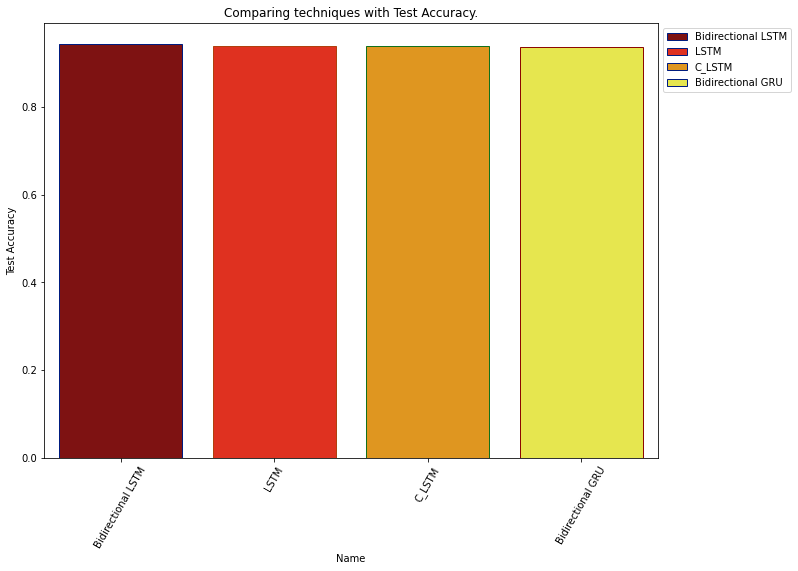

In [49]:
test_comparison=compare_plots("Test Accuracy","DL comparison","test comparison")

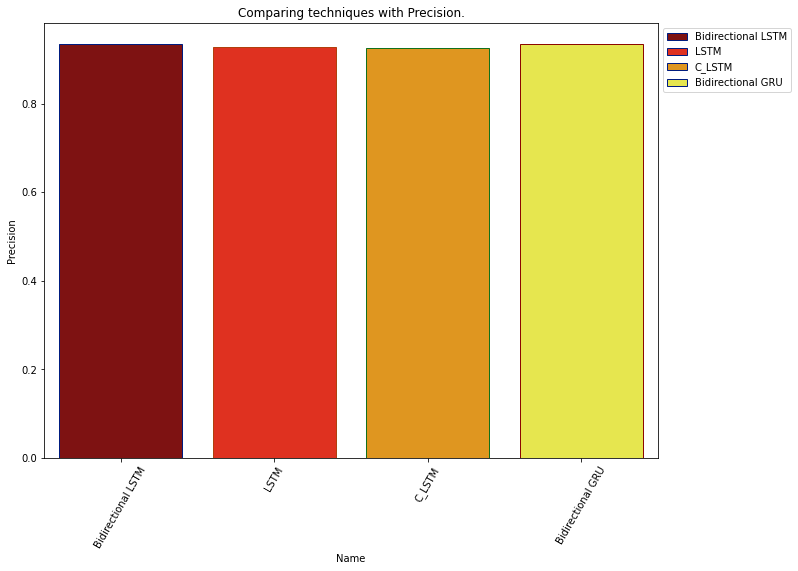

In [50]:
Precision_comparison=compare_plots("Precision","DL comparison","Precision comparison")

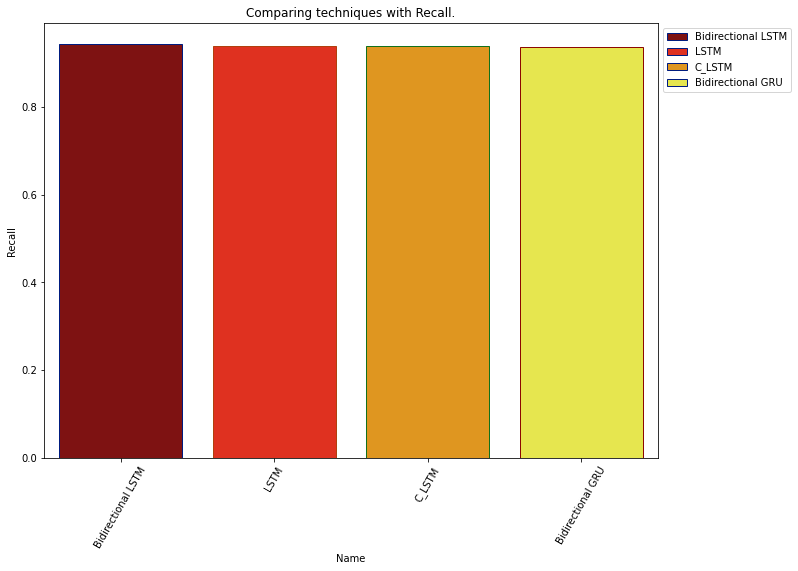

In [51]:
Recall_comparison=compare_plots("Recall","DL comparison","Recall comparison")

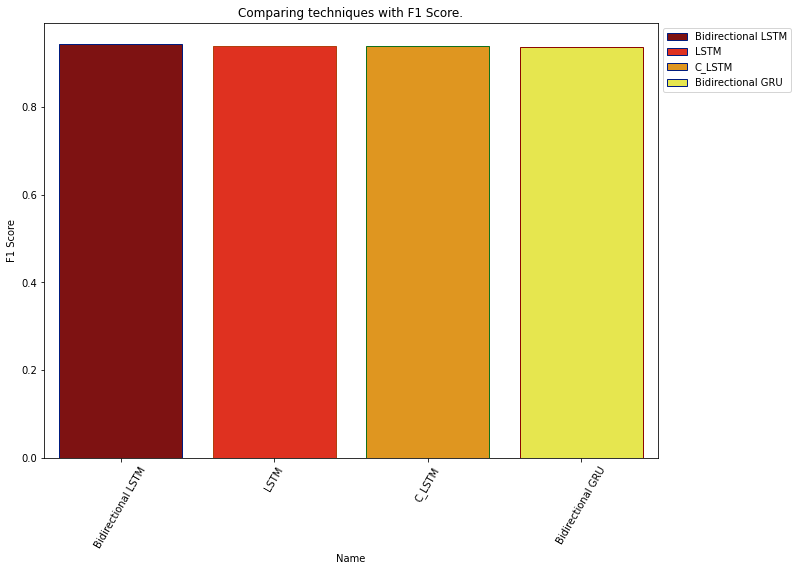

In [52]:
F1_comparison=compare_plots("F1 Score","DL comparison","F1 Score comparison")

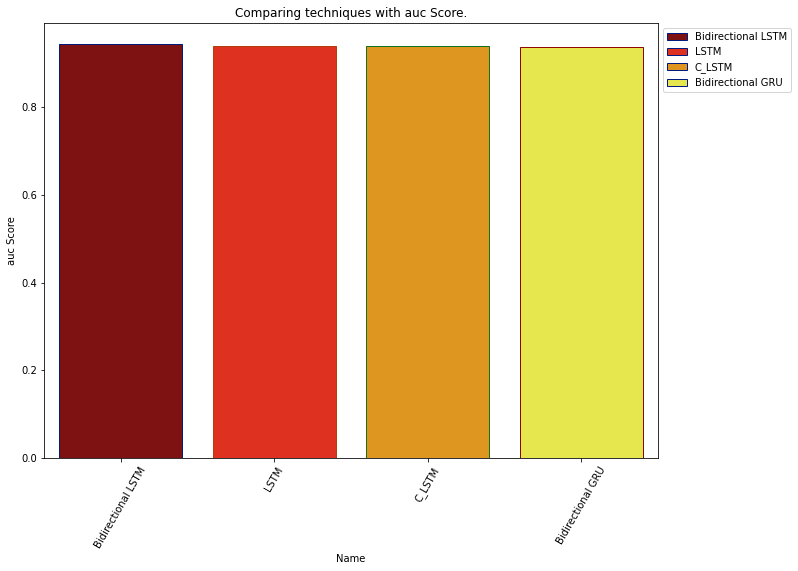

In [53]:
auc_comparison=compare_plots("auc Score","DL comparison","auc Score comparison")

In [54]:
compare.to_csv(path + '/dataset/created/dl_compare.csv', index=False)

In [55]:
# plotly
!pip install chart-studio
from chart_studio import plotly as py
#import plotly.plotly as py
import plotly
import plotly.offline as pyo

from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode()
import plotly.graph_objs as go
import plotly.figure_factory as ff # import figure factory

Output hidden; open in https://colab.research.google.com to view.

In [56]:

# create trace3 
trace3 = go.Bar(
         x = np.array("C_LSTM"),
         y = np.array(compare[compare["Name"] == 'C_LSTM']['Test Accuracy']),
         name = "C_LSTM",
         marker = dict(color ='rgba(36, 44, 188, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace4 
trace4 = go.Bar(
         x = np.array("Bidirectional LSTM"),
         y = np.array(compare[compare["Name"] == 'Bidirectional LSTM']['Test Accuracy']),
         name = "Bidirectional LSTM",
         marker = dict(color ='rgba(209, 0, 224, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace5 
trace5 = go.Bar(
         x = np.array("Bidirectional GRU"),
         y = np.array(compare[compare["Name"] == 'Bidirectional GRU']['Test Accuracy']),
         name = "Bidirectional GRU",
         marker = dict(color ='rgba(0, 224, 209, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )
# create trace6 
trace6 = go.Bar(
         x = np.array("LSTM"),
         y = np.array(compare[compare["Name"] == 'LSTM']['Test Accuracy']),
         name = "LSTM",
         marker = dict(color ='rgba(255, 255, 61, 1)',
         line=dict(color='rgb(0,0,0)',width=1))
                    )

data = [trace4,trace6,trace3,trace5]
layout = go.Layout(barmode = "group",title="Deep Learning Classification Models test accuracy Comparison")
fig = go.Figure(data = data, layout = layout)
fig.show(renderer="colab")